<a href="https://colab.research.google.com/github/urvashiramdasani/ML-DL-Python/blob/master/DL/18BCE247_DL5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Name : Urvashi Ramdasani

Division : EL3

Aim : CIFAR10 image classification using Transfer Learning (without generators)

In [1]:
# Load the libraries

import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, GlobalAveragePooling2D, Dropout
import keras
from sklearn import metrics
from keras.utils import np_utils
from keras.datasets import cifar10
import random
from keras.applications import Xception
from keras.applications.xception import preprocess_input
import cv2

In [2]:
# Load the data

(X_train, y_train), (X_test, y_test) = cifar10.load_data()
print('X_train shape : ', X_train.shape)
print('y_train shape : ', y_train.shape)
print('X_test shape : ', X_test.shape)
print('y_test shape : ', y_test.shape)

X_train shape :  (50000, 32, 32, 3)
y_train shape :  (50000, 1)
X_test shape :  (10000, 32, 32, 3)
y_test shape :  (10000, 1)


In [4]:
# Class labels

class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

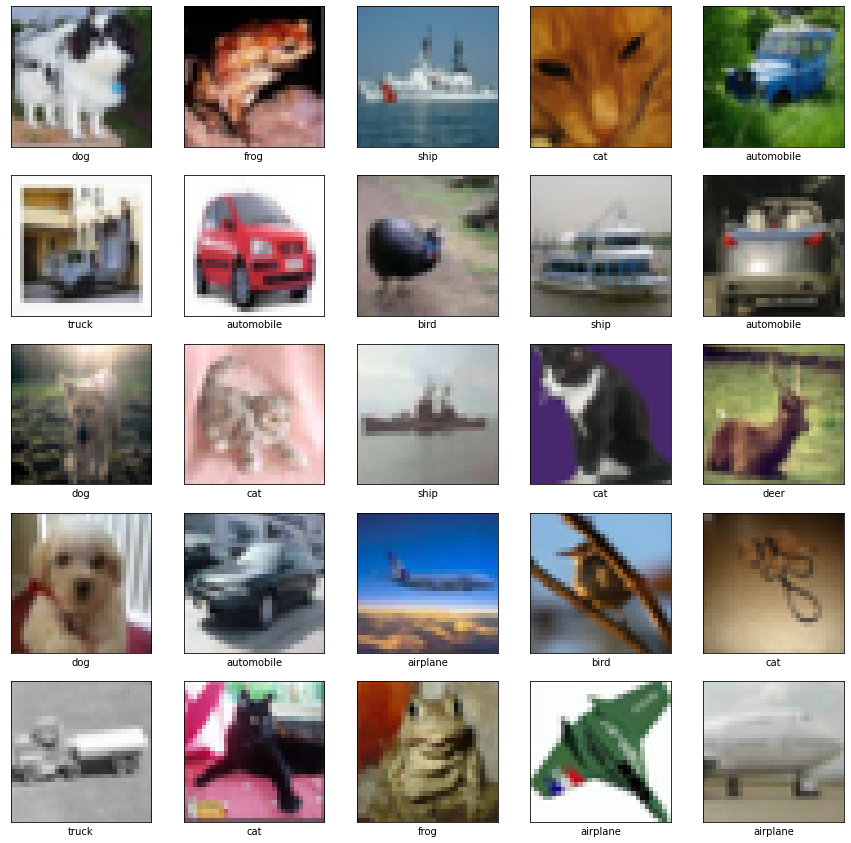

In [5]:
# Plotting random images

plt.figure(figsize = (15, 15))
for i in range(25):
  plt.subplot(5, 5, i+1)
  plt.xticks([])
  plt.yticks([])
  rand_no = random.randint(0, len(X_train))
  plt.imshow(X_train[rand_no])
  plt.xlabel(class_names[int(y_train[rand_no])])

In [6]:
# One Hot Encoding

y_train = np_utils.to_categorical(y_train)
y_test_tmp = y_test
y_test = np_utils.to_categorical(y_test)

In [7]:
# Resize for Xception

X_train = np.array([cv2.resize(X_train[i], dsize = (72, 72), interpolation = cv2.INTER_CUBIC) for i in range(len(X_train))]).astype('float32')
X_test = np.array([cv2.resize(X_test[i], dsize = (72, 72), interpolation = cv2.INTER_CUBIC) for i in range(len(X_test))]).astype('float32')
print('X_train after reshape : ', X_train.shape)
print('X_test after reshape : ', X_test.shape)

X_train after reshape :  (50000, 72, 72, 3)
X_test after reshape :  (10000, 72, 72, 3)


In [8]:
# Load pretrained Xception model without top

pretrained_model = Xception(include_top = False, weights = 'imagenet', input_shape = (72, 72, 3))

In [9]:
# Preprocess and generate features

X_train = preprocess_input(X_train[0:35000])
X_train = pretrained_model.predict(X_train)
X_test = preprocess_input(X_test)
X_test = pretrained_model.predict(X_test)

In [10]:
# Classifier on top

model = Sequential()
model.add(GlobalAveragePooling2D(input_shape = (7, 7, 2048))) # 
model.add(Dropout(0.2))
model.add(Dense(10, activation = 'softmax'))

# Compile the model

model.compile(optimizer = 'adam', metrics = ['accuracy'], loss = 'categorical_crossentropy')
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
global_average_pooling2d (Gl (None, 2048)              0         
_________________________________________________________________
dropout (Dropout)            (None, 2048)              0         
_________________________________________________________________
dense (Dense)                (None, 10)                20490     
Total params: 20,490
Trainable params: 20,490
Non-trainable params: 0
_________________________________________________________________


In [11]:
# Train the model

history = model.fit(X_train, y_train, epochs = 10, batch_size = 32, validation_split = 0.1)

Epoch 1/10
985/985 [==============================] - 5s 4ms/step - loss: 1.0835 - accuracy: 0.6437 - val_loss: 0.8201 - val_accuracy: 0.7300
Epoch 2/10
985/985 [==============================] - 4s 4ms/step - loss: 0.7646 - accuracy: 0.7493 - val_loss: 0.8063 - val_accuracy: 0.7386
Epoch 3/10
985/985 [==============================] - 4s 4ms/step - loss: 0.7092 - accuracy: 0.7660 - val_loss: 0.7777 - val_accuracy: 0.7503
Epoch 4/10
985/985 [==============================] - 4s 4ms/step - loss: 0.6636 - accuracy: 0.7747 - val_loss: 0.7882 - val_accuracy: 0.7469
Epoch 5/10
985/985 [==============================] - 4s 4ms/step - loss: 0.6546 - accuracy: 0.7802 - val_loss: 0.7859 - val_accuracy: 0.7417
Epoch 6/10
985/985 [==============================] - 4s 4ms/step - loss: 0.6620 - accuracy: 0.7748 - val_loss: 0.7998 - val_accuracy: 0.7417
Epoch 7/10
985/985 [==============================] - 4s 4ms/step - loss: 0.6428 - accuracy: 0.7837 - val_loss: 0.7868 - val_accuracy: 0.7509
Epoch 

In [12]:
# Evaluate the model

loss_and_metrics = model.evaluate(X_test, y_test, batch_size = 32)
print("Loss on test data : ", loss_and_metrics[0])
print("Accuracy on test data : ", loss_and_metrics[1])

313/313 [==============================] - 1s 2ms/step - loss: 0.7931 - accuracy: 0.7536
Loss on test data :  0.7931330800056458
Accuracy on test data :  0.753600001335144


In [13]:
# Make predictions

classes = model.predict(X_test, batch_size = 32)
y_predicted = []
for i in range(len(classes)):
  y_predicted.append(np.argmax(classes[i]))
print(y_predicted)

[3, 8, 8, 8, 6, 6, 1, 3, 3, 1, 0, 9, 3, 7, 9, 8, 3, 7, 8, 6, 7, 0, 4, 9, 4, 2, 5, 6, 9, 6, 6, 5, 4, 5, 9, 2, 4, 9, 9, 5, 4, 6, 5, 3, 0, 9, 5, 8, 4, 6, 9, 8, 0, 3, 8, 8, 7, 3, 5, 3, 7, 2, 3, 3, 2, 2, 1, 2, 5, 7, 0, 6, 8, 8, 0, 2, 7, 3, 7, 8, 8, 1, 1, 7, 7, 7, 7, 7, 8, 9, 1, 3, 8, 6, 4, 3, 6, 4, 0, 7, 4, 5, 6, 3, 1, 1, 2, 6, 3, 7, 4, 0, 6, 6, 1, 3, 0, 4, 6, 7, 8, 5, 1, 2, 8, 0, 8, 3, 5, 2, 4, 1, 8, 9, 5, 2, 9, 0, 6, 8, 6, 5, 6, 5, 8, 7, 6, 5, 5, 2, 8, 1, 6, 7, 0, 8, 3, 9, 3, 4, 2, 1, 3, 6, 0, 4, 8, 4, 5, 4, 9, 9, 9, 8, 9, 9, 3, 7, 5, 0, 0, 5, 2, 4, 3, 8, 6, 3, 4, 8, 5, 8, 8, 0, 7, 4, 8, 8, 7, 8, 5, 0, 8, 7, 1, 5, 0, 5, 7, 9, 7, 0, 5, 7, 1, 0, 7, 1, 1, 2, 7, 6, 9, 3, 3, 1, 4, 4, 7, 5, 5, 1, 3, 8, 8, 0, 6, 9, 5, 6, 1, 1, 8, 9, 0, 3, 0, 9, 5, 2, 5, 3, 9, 9, 6, 8, 3, 2, 8, 9, 8, 1, 5, 5, 0, 8, 0, 4, 7, 0, 4, 5, 3, 3, 8, 3, 0, 5, 4, 3, 9, 0, 6, 1, 9, 9, 8, 0, 5, 9, 1, 2, 6, 1, 3, 4, 6, 0, 0, 6, 6, 6, 5, 2, 6, 0, 9, 2, 1, 6, 8, 6, 8, 8, 4, 0, 6, 7, 5, 5, 3, 3, 2, 6, 2, 1, 7, 5, 4, 6, 1, 9, 5, 

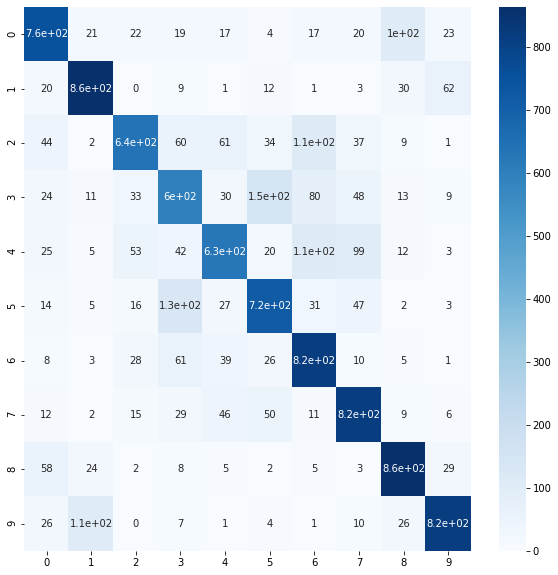

In [14]:
# Confusion matrix

import seaborn as sns

fig, ax = plt.subplots(figsize=(10, 10))
cm = metrics.confusion_matrix(y_true = y_test_tmp, y_pred = y_predicted)
sns.heatmap(cm, annot = True, cmap = 'Blues', ax = ax)

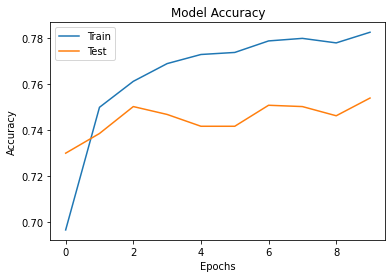

In [15]:
# Accuracy Plot

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['Train','Test'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.show()

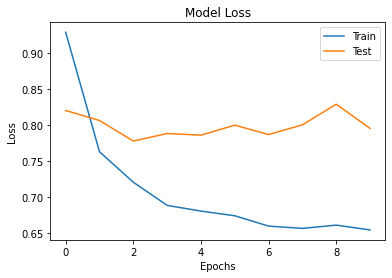

In [16]:
# Loss Plot

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['Train','Test'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.show()